In [23]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import random
import pickle

In [3]:
Datadir = './Training_files/PetImages/'
Categories = ['Dog', 'Cat']

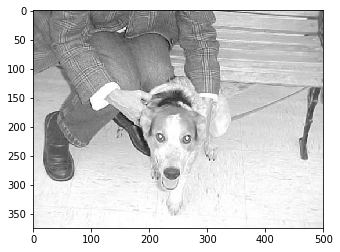

In [6]:
for category in Categories:
    path = os.path.join(Datadir,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break

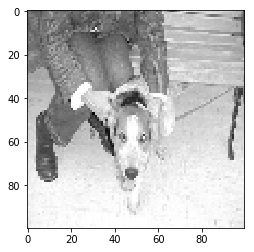

In [10]:
IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [11]:
training_data = []

def create_training_data():
    for category in Categories:
        path = os.path.join(Datadir,category)
        class_num = Categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

create_training_data()

In [19]:
random.shuffle(training_data)

In [20]:
for sample in training_data[:20]:
    print(sample[1])

0
0
1
1
0
0
0
1
0
1
0
0
1
1
1
0
0
1
0
1


In [22]:
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [24]:
pickle_out = open('./Training_files/PetImages/X.pickle', 'wb')
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open('./Training_files/PetImages/y.pickle', 'wb')
pickle.dump(y, pickle_out)
pickle_out.close()